In [1]:
#loading some stuff 
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import pickle
import datetime
from random import randrange

In [2]:
#setting system path
import sys
sys.path.append('c:/Users/tpiechowiak/Documents/BEAR/GNOS/sws_machine_learning/')
base_path = 'c:/Users/tpiechowiak/OneDrive - GN Store Nord/GNOS data/'

In [3]:
#now loading all the necessary data files
with open(base_path + "hi_id_ADL_before_return.pkl", "rb") as input_file:
    hi_ADL = pickle.load(input_file)
print("Read hi ids data from pickle file")

with open(base_path + "resampled_last_ADL_before_return.pkl", "rb") as input_file:
    adl_ = pickle.load(input_file)
print("Read resampled data from pickle file")

Read hi ids data from pickle file
Read resampled data from pickle file


In [4]:
adl_.keys()

Index(['ADLProperties_TotalUseTime', 'ADLProperties_NumberOfDeviceBoots',
       'ADLProperties_NumberOfPowerDowns',
       'ADLProperties_NumberOfPresetSwitches', 'VolumeControl',
       'ADLRawData_HearingInstrumentId', 'class'],
      dtype='object')

In [5]:
#now create category of isVolumenChange
adl_['isVolumeChange'] = 0
adl_.loc[adl_['VolumeControl'].diff() != 0,'isVolumeChange'] = 1

In [6]:
plot_data_1 = []
plot_data_2 = []
plot_data_3 = []
plot_data_4 = []
plot_data_5 = []

class_ = []
cnt = 0 
nrWeeks = 12
#now prepare the numpy for plotting the data 
for hi_id, group in adl_.groupby('ADLRawData_HearingInstrumentId'):
    if (cnt%1000 == 0):
        print(cnt)
    
    if (hi_id in hi_ADL):
    
        tmp1 = group['ADLProperties_TotalUseTime'].iloc[-nrWeeks:].values     
        tmp2 = group['ADLProperties_NumberOfPresetSwitches'].iloc[-nrWeeks:].values    
        tmp3 = group['ADLProperties_NumberOfPowerDowns'].iloc[-nrWeeks:].values
        tmp4 = group['isVolumeChange'].iloc[-nrWeeks:].values
        tmp5 = group['ADLProperties_NumberOfDeviceBoots'].iloc[-nrWeeks:].values
        
    else:
        rnd = randrange(group.shape[0] - nrWeeks)
        tmp1 = group['ADLProperties_TotalUseTime'].iloc[rnd:rnd + nrWeeks].values     
        tmp2 = group['ADLProperties_NumberOfPresetSwitches'].iloc[rnd:rnd + nrWeeks].values    
        tmp3 = group['ADLProperties_NumberOfPowerDowns'].iloc[rnd:rnd + nrWeeks].values
        tmp4 = group['isVolumeChange'].iloc[rnd:rnd + nrWeeks].values
        tmp5 = group['ADLProperties_NumberOfDeviceBoots'].iloc[rnd:rnd + nrWeeks].values
    
    #use time 
    if (tmp1.shape[0] != 12):
        continue
        
    if(np.any(tmp1 < 0)):
        continue
                
    if(np.any(tmp1 > 24)):
        continue
    
    #prests
    if (tmp2.shape[0] != 12):
        continue
        
    if(np.any(tmp2 < 0)):
        continue
                
    if(np.any(tmp2 > 1000)):
        continue
    
    #power downs 
    if (tmp3.shape[0] != 12):
        continue
        
    if(np.any(tmp3 < 0)):
        continue
                
    if(np.any(tmp3 > 1000)):
        continue
    
    #volume change 
    if (tmp4.shape[0] != 12):
        continue
        
    if(np.any(tmp4 < -100)):
        continue
                
    if(np.any(tmp4 > 100)):
        continue
    
    #re-boots 
    if (tmp5.shape[0] != 12):
        continue
        
    if(np.any(tmp5 < 0)):
        continue
                
    if(np.any(tmp5 > 1000)):
        continue
    
    plot_data_1.append(tmp1)
    plot_data_2.append(tmp2)
    plot_data_3.append(tmp3)
    plot_data_4.append(tmp4)
    plot_data_5.append(tmp5)
    
    
    class_.append(group['class'].iloc[0])
    cnt += 1    
    
plot_data_1 = np.array(plot_data_1)
plot_data_2 = np.array(plot_data_2)
plot_data_3 = np.array(plot_data_3)
plot_data_4 = np.array(plot_data_4)
plot_data_5 = np.array(plot_data_5)
class_labels_array = np.array(class_)

0
0
1000
2000
3000
4000
5000
5000
6000
7000
8000
9000
10000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
37000
38000


In [7]:

from sklearn.utils import resample

#now we need to get the right shape for the CNN 
nr_samples_majority = 4000
nr_samples_minority = 2000

####resample data for use-time

# Upsample minority class
minority_upsampled = resample(plot_data_1[class_labels_array == 1,:], 
                                 replace=True,     # sample with replacement
                                 n_samples=nr_samples_minority, 
                                 random_state=42) # reproducible results
# Downsample majority class
majority_downsampled = resample(plot_data_1[class_labels_array == 0,:], 
                                 replace=False,     # sample with replacement
                                 n_samples=nr_samples_majority, 
                                 random_state=42) # reproducible results

plot_data_1_ = np.concatenate([minority_upsampled, majority_downsampled],axis = 0)

####resample data for preset changes

# Upsample minority class 
minority_upsampled = resample(plot_data_2[class_labels_array == 1,:], 
                                 replace=True,     # sample with replacement
                                 n_samples=nr_samples_minority, 
                                 random_state=42) # reproducible results
# Downsample majority class
majority_downsampled = resample(plot_data_2[class_labels_array == 0,:], 
                                 replace=False,     # sample with replacement
                                 n_samples=nr_samples_majority, 
                                 random_state=42) # reproducible results

plot_data_2_ = np.concatenate([minority_upsampled, majority_downsampled],axis = 0)

####resample data for power downs

# Upsample minority class 
minority_upsampled = resample(plot_data_3[class_labels_array == 1,:], 
                                 replace=True,     # sample with replacement
                                 n_samples=nr_samples_minority, 
                                 random_state=42) # reproducible results
# Downsample majority class
majority_downsampled = resample(plot_data_3[class_labels_array == 0,:], 
                                 replace=False,     # sample with replacement
                                 n_samples=nr_samples_majority, 
                                 random_state=42) # reproducible results

plot_data_3_ = np.concatenate([minority_upsampled, majority_downsampled],axis = 0)

####resample volume change

# Upsample minority class 
minority_upsampled = resample(plot_data_4[class_labels_array == 1,:], 
                                 replace=True,     # sample with replacement
                                 n_samples=nr_samples_minority, 
                                 random_state=42) # reproducible results
# Downsample majority class
majority_downsampled = resample(plot_data_4[class_labels_array == 0,:], 
                                 replace=False,     # sample with replacement
                                 n_samples=nr_samples_majority, 
                                 random_state=42) # reproducible results


plot_data_4_ = np.concatenate([minority_upsampled, majority_downsampled],axis = 0)

####resample re-boots

# Upsample minority class 
minority_upsampled = resample(plot_data_5[class_labels_array == 1,:], 
                                 replace=True,     # sample with replacement
                                 n_samples=nr_samples_minority, 
                                 random_state=42) # reproducible results
# Downsample majority class
majority_downsampled = resample(plot_data_5[class_labels_array == 0,:], 
                                 replace=False,     # sample with replacement
                                 n_samples=nr_samples_majority, 
                                 random_state=42) # reproducible results

plot_data_5_ = np.concatenate([minority_upsampled, majority_downsampled],axis = 0)

class_labels_array_ = np.concatenate([np.ones(nr_samples_minority), np.zeros(nr_samples_majority)], axis = 0)


In [8]:
mean1 = {}
mean2 = {}
std1 = {}
std2 = {}

mean1[0] = plot_data_1_[np.where(class_labels_array_ == 1)].mean(axis = 0)
mean2[0] = plot_data_1_[np.where(class_labels_array_ == 0)].mean(axis = 0)
std1[0] = plot_data_1_[np.where(class_labels_array_ == 1)].std(axis = 0)
std2[0] = plot_data_1_[np.where(class_labels_array_ == 0)].std(axis = 0)

mean1[1] = plot_data_2_[np.where(class_labels_array_ == 1)].mean(axis = 0)
mean2[1] = plot_data_2_[np.where(class_labels_array_ == 0)].mean(axis = 0)
std1[1] = plot_data_2_[np.where(class_labels_array_ == 1)].std(axis = 0)
std2[1] = plot_data_2_[np.where(class_labels_array_ == 0)].std(axis = 0)

mean1[2] = plot_data_3_[np.where(class_labels_array_ == 1)].mean(axis = 0)
mean2[2] = plot_data_3_[np.where(class_labels_array_ == 0)].mean(axis = 0)
std1[2] = plot_data_3_[np.where(class_labels_array_ == 1)].std(axis = 0)
std2[2] = plot_data_3_[np.where(class_labels_array_ == 0)].std(axis = 0)

mean1[3] = plot_data_4_[np.where(class_labels_array_ == 1)].mean(axis = 0)
mean2[3] = plot_data_4_[np.where(class_labels_array_ == 0)].mean(axis = 0)
std1[3] = plot_data_4_[np.where(class_labels_array_ == 1)].std(axis = 0)
std2[3] = plot_data_4_[np.where(class_labels_array_ == 0)].std(axis = 0)

mean1[4] = plot_data_5_[np.where(class_labels_array_ == 1)].mean(axis = 0)
mean2[4] = plot_data_5_[np.where(class_labels_array_ == 0)].mean(axis = 0)
std1[4] = plot_data_5_[np.where(class_labels_array_ == 1)].std(axis = 0)
std2[4] = plot_data_5_[np.where(class_labels_array_ == 0)].std(axis = 0)


Text(0, 0.5, 'Number of \n re-boots')

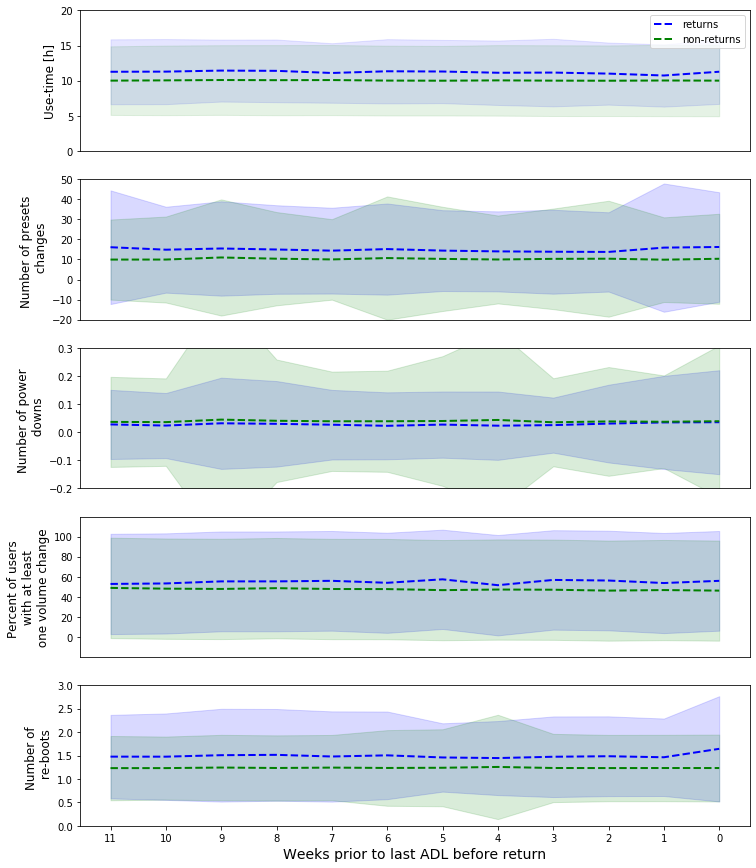

In [9]:
fig, ax = plt.subplots(5,1, figsize = (12,15))

#use-time
idx = 0
ax[idx].plot(mean1[idx], color = 'b',linewidth = 2, linestyle = '--',label = 'returns')
ax[idx].plot(mean2[idx], color = 'g', linewidth = 2, linestyle = '--',label = 'non-returns') 
ax[idx].fill_between(range(0,12), mean1[idx]-std1[idx], mean1[idx] + std1[idx], alpha = 0.1, color = 'b')
ax[idx].fill_between(range(0,12), mean2[idx]-std2[idx], mean2[idx] + std2[idx], alpha = 0.1, color = 'g')
ax[idx].set_xticks([])
ax[idx].set_ylim([0, 20])
ax[idx].set_ylabel('Use-time [h]', fontsize = 12)
ax[idx].legend()

#Presets 
idx = 1
ax[idx].plot(mean1[idx], color = 'b',linewidth = 2, linestyle = '--')
ax[idx].plot(mean2[idx], color = 'g', linewidth = 2, linestyle = '--') 
ax[idx].fill_between(range(0,12), mean1[idx]-std1[idx], mean1[idx] + std1[idx], alpha = 0.15, color = 'b')
ax[idx].fill_between(range(0,12), mean2[idx]-std2[idx], mean2[idx] + std2[idx], alpha = 0.15, color = 'g')
ax[idx].set_xticks([])
ax[idx].set_ylim([-20, 50])
ax[idx].set_ylabel('Number of presets \n changes', fontsize = 12)


#Power downs
idx = 2
ax[idx].plot(mean1[idx], color = 'b',linewidth = 2, linestyle = '--')
ax[idx].plot(mean2[idx], color = 'g', linewidth = 2, linestyle = '--') 
ax[idx].fill_between(range(0,12), mean1[idx]-std1[idx], mean1[idx] + std1[idx], alpha = 0.15, color = 'b')
ax[idx].fill_between(range(0,12), mean2[idx]-std2[idx], mean2[idx] + std2[idx], alpha = 0.15, color = 'g')
ax[idx].set_xticks([])
ax[idx].set_ylim([-0.2, 0.3])
ax[idx].set_ylabel('Number of power \n downs', fontsize = 12)

#Volume changes
idx = 3
ax[idx].plot(mean1[idx], color = 'b',linewidth = 2, linestyle = '--')
ax[idx].plot(mean2[idx], color = 'g', linewidth = 2, linestyle = '--') 
ax[idx].fill_between(range(0,12), mean1[idx]-std1[idx], mean1[idx] + std1[idx], alpha = 0.15, color = 'b')
ax[idx].fill_between(range(0,12), mean2[idx]-std2[idx], mean2[idx] + std2[idx], alpha = 0.15, color = 'g')
ax[idx].set_xticks([])
ax[idx].set_ylim([-0.2, 1.2])
ax[idx].set_ylabel('Percent of users \n with at least \n one volume change ', fontsize = 12)
ax[idx].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax[idx].set_yticklabels([0, 20, 40, 60, 80, 100])

#Re-boots
idx = 4
ax[idx].plot(mean1[idx], color = 'b',linewidth = 2, linestyle = '--')
ax[idx].plot(mean2[idx], color = 'g', linewidth = 2, linestyle = '--') 
ax[idx].fill_between(range(0,12), mean1[idx]-std1[idx], mean1[idx] + std1[idx], alpha = 0.15, color = 'b')
ax[idx].fill_between(range(0,12), mean2[idx]-std2[idx], mean2[idx] + std2[idx], alpha = 0.15, color = 'g')
ax[idx].set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax[idx].set_xticklabels([11, 10, 9, 8, 7, 6, 5,4,3,2,1,0])
ax[idx].set_xlabel('Weeks prior to last ADL before return',fontsize = 14)
ax[idx].set_ylim([0, 3])
ax[idx].set_ylabel('Number of \n re-boots', fontsize = 12)


In [10]:
#now try to do the logistic regression for return prediction (prepare data)
X_ = np.concatenate([plot_data_1_, 
                     plot_data_2_,
                     plot_data_3_,
                     #plot_data_4,
                     plot_data_5_],axis=1)
Y_ = class_labels_array_
data_names = np.array(['Use_time_%d' % i for i in range(11,-1,-1)] + \
                      ['Presets_%d' % i for i in range(11,-1,-1)] + \
['Power_downs_%d' % i for i in range(11,-1,-1)] + \
                      #['Volume_changes_%d' % i for i in range(11,-1,-1)] + \
['re-boots_%d' % i for i in range(11,-1,-1)])
                     

In [11]:
import statsmodels.api as sm
logit_model=sm.Logit(Y_,X_)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.628904
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.012     
Dependent Variable: y                AIC:              7642.8466 
Date:               2020-08-07 13:50 BIC:              7964.4233 
No. Observations:   6000             Log-Likelihood:   -3773.4   
Df Model:           47               LL-Null:          -3819.1   
Df Residuals:       5952             LLR p-value:      0.00011462
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
x1         0.0118     0.0148    0.8022   0.4224   -0.0171    0.0408
x2         0.0095     0.0152    0.6246   0.5323   -0.0203 

In [12]:
np.exp(result.params[result.pvalues < 0.05])

array([0.96542171, 1.04266421, 0.92990151, 0.94673057, 1.00674013,
       1.00754547, 0.32130021, 2.25680422, 0.81691954, 1.27438571,
       0.74812843, 2.15889436])

In [13]:
idx = np.where(result.pvalues < 0.05)

In [14]:
(data_names[idx],np.exp(result.params[result.pvalues < 0.05]))

(array(['Use_time_7', 'Use_time_5', 'Use_time_1', 'Use_time_0',
        'Presets_11', 'Presets_1', 'Power_downs_6', 'Power_downs_1',
        're-boots_9', 're-boots_6', 're-boots_5', 're-boots_0'],
       dtype='<U14'),
 array([0.96542171, 1.04266421, 0.92990151, 0.94673057, 1.00674013,
        1.00754547, 0.32130021, 2.25680422, 0.81691954, 1.27438571,
        0.74812843, 2.15889436]))

In [15]:
#now try again with the CNN 
X_CNN = np.concatenate([plot_data_1_, 
                     plot_data_2_,
                     plot_data_3_,
                     plot_data_4_,
                     plot_data_5_],axis=1)

In [16]:
X_CNN = np.array([plot_data_1_.flatten(), 
plot_data_2_.flatten(),
plot_data_3_.flatten(),
plot_data_4_.flatten(),
plot_data_5_.flatten()]).transpose()

In [17]:
X_CNN.shape

(72000, 5)

In [18]:
#get the right format for the inputs 
X_CNN = X_CNN.reshape(int(X_CNN.shape[0] / 12), 12, 5)
Y_CNN = np.zeros((Y_.shape[0],1))
Y_CNN[np.where(Y_ == 1)] = 1

In [19]:
Y_CNN.shape

(6000, 1)

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Dropout
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras import models

Using TensorFlow backend.


In [21]:
#now one-hot encode
Y_OHC = to_categorical(Y_CNN)

In [22]:
#make train, test data
trainX, testX, trainY, testY = train_test_split(X_CNN, Y_OHC, test_size=0.20, random_state=0)
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainY.shape[1]

In [23]:
n_features

5

In [24]:
#try an easy 1D conv 
model = Sequential()
model.add(Conv1D(16,4, activation = 'relu',  input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.5)) 
model.add(MaxPooling1D(pool_size = 2))
model.add(Flatten())
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
        


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 9, 16)             336       
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 16)             0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 4, 16)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 466
Trainable params: 466
Non-trainable params: 0
_________________________________________________________________


In [30]:
#model fitting
clf = model.fit(trainX, trainY, epochs=20, batch_size=32, validation_split = 0.2)

Train on 3840 samples, validate on 960 samples
Epoch 1/20
3840/3840 [==============================] - 0s 100us/step - loss: 0.6204 - accuracy: 0.6612 - val_loss: 0.6112 - val_accuracy: 0.6781
Epoch 2/20
3840/3840 [==============================] - 0s 99us/step - loss: 0.6196 - accuracy: 0.6674 - val_loss: 0.6089 - val_accuracy: 0.6812
Epoch 3/20
3840/3840 [==============================] - 0s 112us/step - loss: 0.6279 - accuracy: 0.6635 - val_loss: 0.6086 - val_accuracy: 0.6750
Epoch 4/20
3840/3840 [==============================] - 0s 92us/step - loss: 0.6177 - accuracy: 0.6687 - val_loss: 0.6085 - val_accuracy: 0.6740
Epoch 5/20
3840/3840 [==============================] - 0s 84us/step - loss: 0.6163 - accuracy: 0.6706 - val_loss: 0.6082 - val_accuracy: 0.6781
Epoch 6/20
3840/3840 [==============================] - 0s 84us/step - loss: 0.6133 - accuracy: 0.6680 - val_loss: 0.6054 - val_accuracy: 0.6833
Epoch 7/20
3840/3840 [==============================] - 0s 84us/step - loss: 0.62

In [31]:
model.evaluate(testX,testY,verbose=1)

1200/1200 [==============================] - 0s 40us/step


[0.5957809344927469, 0.6866666674613953]

Text(0, 0.5, 'True Positives')

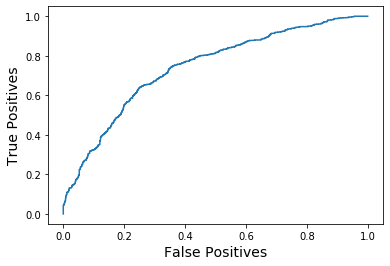

In [55]:
#plot ROC curve 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt 
y_pred_keras = model.predict(testX).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(testY.ravel(), y_pred_keras)

plt.plot(fpr_keras, tpr_keras)
plt.xlabel('False Positives',fontsize=14)
plt.ylabel('True Positives',fontsize=14)

Text(0.5, 0, 'True Class')

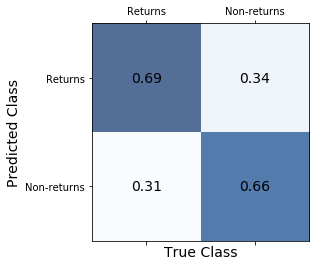

In [117]:
#now plot the cofusion matrix 
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(testY.argmax(axis=1), model.predict_classes(testX))
cfm_norm = np.around(cfm / cfm.sum(axis=0),2)

#nicer confusion matrix
fig, ax = plt.subplots(figsize = (4, 4))
ax.matshow(cfm_norm,cmap=plt.cm.Blues,alpha=0.7)

for i in range(cfm_norm.shape[0]):
    for j in range(cfm_norm.shape[1]):
        ax.text(x=j,y=i, s=cfm_norm[i,j],va='center',ha='center', fontsize = 14)

ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(['Returns','Non-returns'])
ax.set_yticklabels(['Returns','Non-returns'])

ax.set_ylabel('Predicted Class',fontsize=14)
ax.set_xlabel('True Class',fontsize=14)


# Now try the k-nearest neighbor approach 

In [76]:
#now prepare data for k-nearest neighbors 
X_KNN = X_CNN.reshape(X_CNN.shape[0],X_CNN.shape[1] * X_CNN.shape[2])
Y_KNN = Y_CNN

trainX_KNN, testX_KNN, trainY_KNN, testY_KNN = train_test_split(X_KNN, Y_KNN, test_size=0.10, random_state=0)

In [77]:
(trainX_KNN.shape, trainY_KNN.shape)

((5400, 60), (5400, 1))

In [78]:
#now try to use a k-nearest neighbor classifier
from sklearn.neighbors import KNeighborsClassifier


In [109]:
#now train the model (fill memory with training data)
knn = KNeighborsClassifier(n_neighbors= 6)
knn.fit(trainX_KNN, trainY_KNN)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [110]:
knn.score(testX_KNN, testY_KNN)

0.775

Text(0.5, 0, 'True Class')

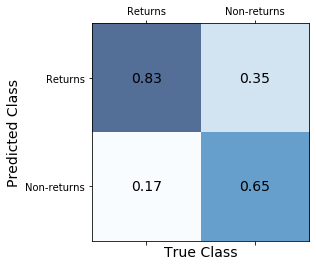

In [116]:
#now plot the confusion matrix for the k nearest neighbors
cfm = confusion_matrix(testY_KNN, knn.predict(testX_KNN))
cfm_norm = np.around(cfm / cfm.sum(axis=0),2)

#nicer confusion matrix
fig, ax = plt.subplots(figsize = (4, 4))
ax.matshow(cfm_norm,cmap=plt.cm.Blues,alpha=0.7)

for i in range(cfm_norm.shape[0]):
    for j in range(cfm_norm.shape[1]):
        ax.text(x=j,y=i, s=cfm_norm[i,j],va='center',ha='center', fontsize=14)

ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(['Returns','Non-returns'])
ax.set_yticklabels(['Returns','Non-returns'])

ax.set_ylabel('Predicted Class',fontsize=14)
ax.set_xlabel('True Class',fontsize=14)



In [112]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(knn, testX_KNN, testY_KNN, cv=10)
cv_scores

array([0.68333333, 0.7       , 0.75      , 0.71666667, 0.76666667,
       0.66666667, 0.68333333, 0.73333333, 0.65      , 0.68333333])

In [102]:
#
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(2, 20)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
#fit model to data
knn_gscv.fit(testX_KNN, testY_KNN)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [113]:
(knn_gscv.best_params_, knn_gscv.best_score_)

({'n_neighbors': 6}, 0.7016666666666668)